<a href="https://colab.research.google.com/github/jck-18/Login-Datathon-2024/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

1. Understand the Structure of the Data

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Train.csv')

# Check the shape (rows and columns) of the dataset
print(data.shape)

# Check the first few rows to get a feel for the data
print(data.head())

# Check data types of each column
print(data.info())


(100000, 4)
   ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
0     216064          112     600.000000   
1    2498090         8360     984.251967   
2     210860           30     850.000000   
3     285757         6104     744.000000   
4    1869643         2201     600.000000   

                                  ENTITY_DESCRIPTION  
0                               Caricaturas (1892)    
1  VJ Interior Modern Solid Interio Cushioned Bar...  
2  Pam: Personalized Name Journal with Blank Line...  
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...  
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 no

2. Check for Missing Values

In [4]:
print(data.isnull().sum())

ENTITY_ID             0
CATEGORY_ID           0
ENTITY_LENGTH         0
ENTITY_DESCRIPTION    0
dtype: int64


3. Target Variable Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

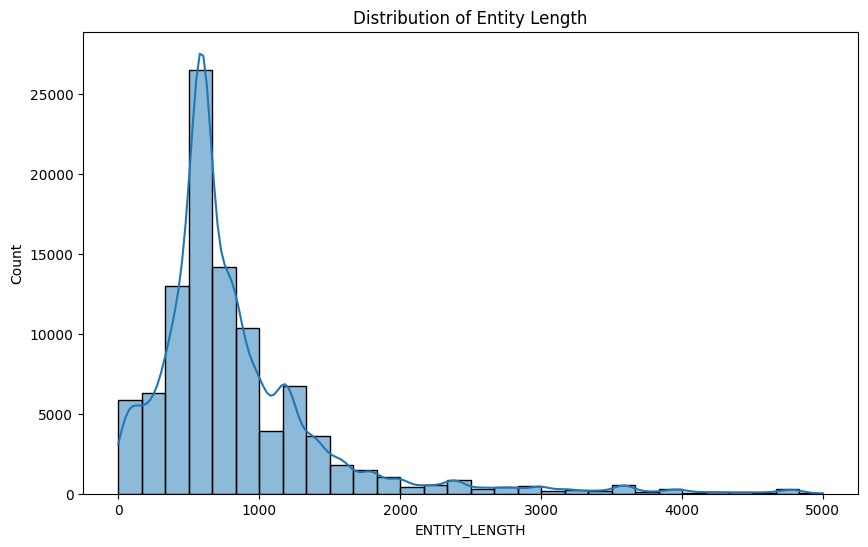

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


4. Category Count Distribution:
sjdf
sdflkbsdf
skjdbfd

> Add blockquote



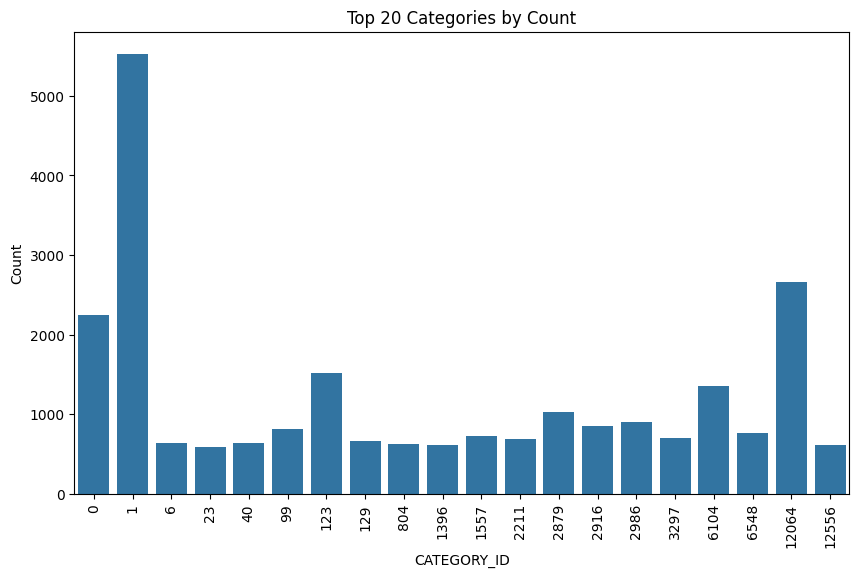

In [6]:
category_counts = data['CATEGORY_ID'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index[:20], y=category_counts.values[:20])
plt.title('Top 20 Categories by Count')
plt.xlabel('CATEGORY_ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [7]:
# Filter rows where ENTITY_LENGTH is 0
entities_with_length_0 = data[data['ENTITY_LENGTH'] == 0]

# View the first few descriptions
print(entities_with_length_0[['ENTITY_ID', 'ENTITY_DESCRIPTION']].head(10))


Empty DataFrame
Columns: [ENTITY_ID, ENTITY_DESCRIPTION]
Index: []


In [8]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'length' and 'CATEGORY_ID' columns
Q1 = data['ENTITY_LENGTH'].quantile(0.25)
Q3 = data['ENTITY_LENGTH'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for outliers
outlier_mask = (data['ENTITY_LENGTH'] < lower_bound) | (data['ENTITY_LENGTH'] > upper_bound)

# Calculate the mean length by CATEGORY_ID
mean_lengths = data.groupby('CATEGORY_ID')['ENTITY_LENGTH'].mean()

# Replace outlier lengths with the mean length of their respective CATEGORY_ID
data.loc[outlier_mask, 'ENTITY_LENGTH'] = data.loc[outlier_mask, 'CATEGORY_ID'].map(mean_lengths)

# Check the updated DataFrame
print(data[outlier_mask])  # Display modified outlier lengths


       ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
5        1601121         2535    3445.444444   
9        2752314         5347     779.245526   
36       2825533         8438    1680.557716   
43        927117            0     737.781516   
50       1294007         1124    1078.309474   
...          ...          ...            ...   
99860    1922294         1635    2621.955602   
99885     919014         2819     942.300337   
99887    2021015        12968    2839.072614   
99904     969049            0     737.781516   
99993    1979724         7256    1630.646105   

                                      ENTITY_DESCRIPTION  
5      Mom's Home Organic Super Soft Cotton Baby Musl...  
9      WOLOUR Stone Wallpaper Stickers Waterproof Sel...  
36     PCCOT ENTERPRISE-Marble Wallpaper Waterproof M...  
43     4 X 6 Valley Forge Flag 2Foot By 3Foot Nylon A...  
50     Comdaq Kitchen Set with Crockery and Cutlery [...  
...                                                  ...  
99860  Car

<function matplotlib.pyplot.show(close=None, block=None)>

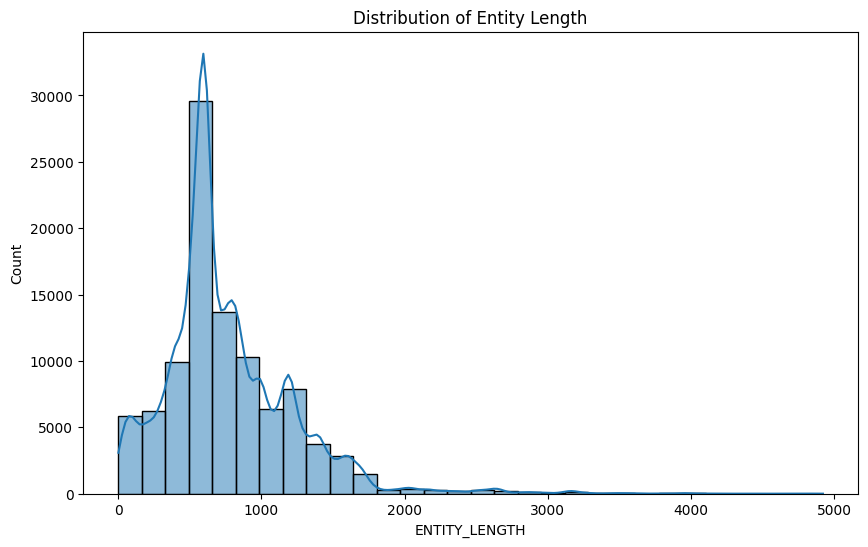

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


CAPPING


In [10]:
lower_cap = data['ENTITY_LENGTH'].quantile(0.01)
upper_cap = data['ENTITY_LENGTH'].quantile(0.99)

data['ENTITY_LENGTH'] = data['ENTITY_LENGTH'].clip(lower=lower_cap, upper=upper_cap)


<function matplotlib.pyplot.show(close=None, block=None)>

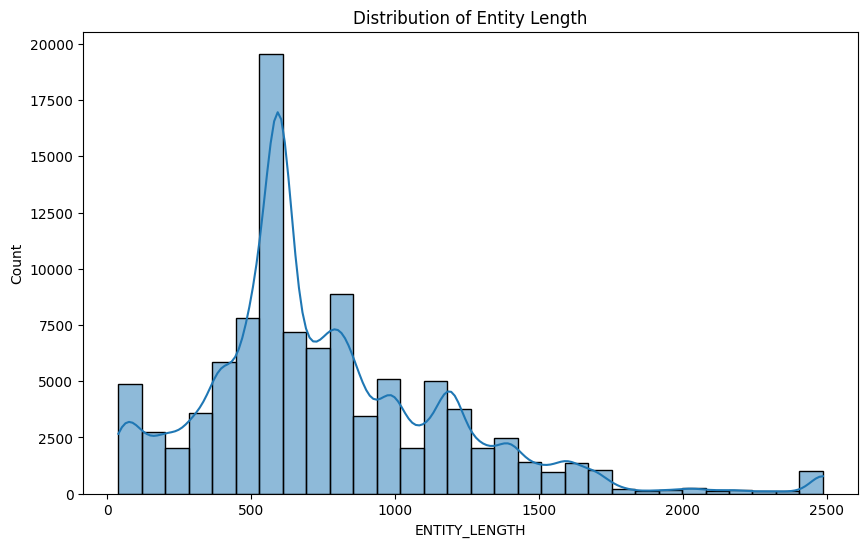

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


LOG NORMALIZATION


In [12]:
import pandas as pd
import numpy as np

# Perform log transformation
data['length_log'] = np.log1p(data['ENTITY_LENGTH'])  # Using log1p for handling zero values

# Check the transformed values
print(data[['ENTITY_LENGTH', 'length_log']].head())

   ENTITY_LENGTH  length_log
0     600.000000    6.398595
1     984.251967    6.892897
2     850.000000    6.746412
3     744.000000    6.613384
4     600.000000    6.398595


<function matplotlib.pyplot.show(close=None, block=None)>

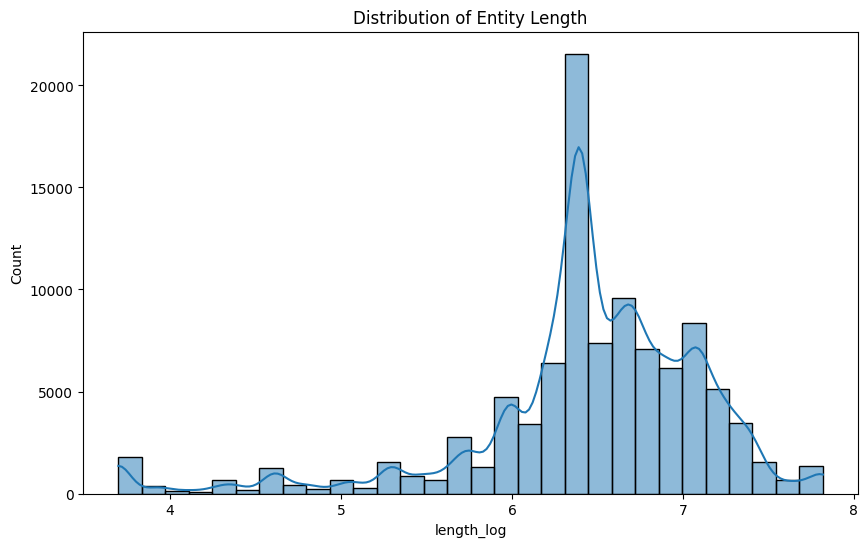

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['length_log'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


with outliers


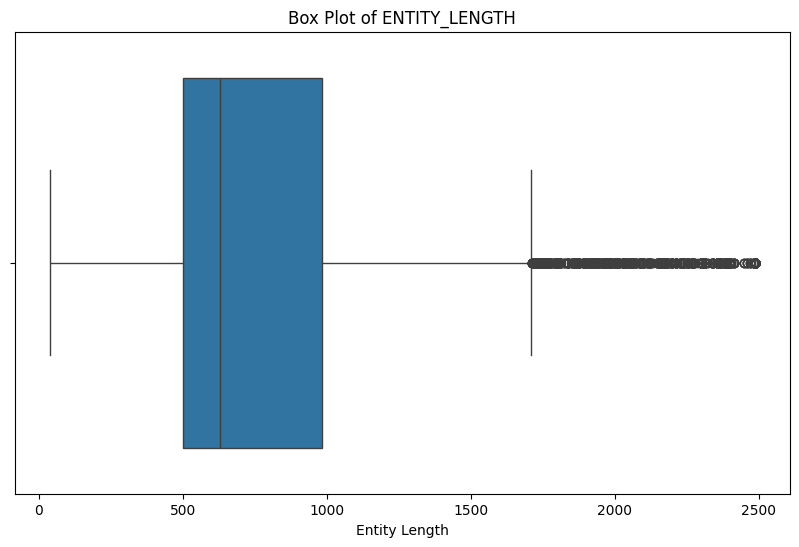

In [14]:
#finding whether there is outliers or not?
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.boxplot(x='ENTITY_LENGTH', data=data)
plt.title('Box Plot of ENTITY_LENGTH')
plt.xlabel('Entity Length')
plt.show()

after removing

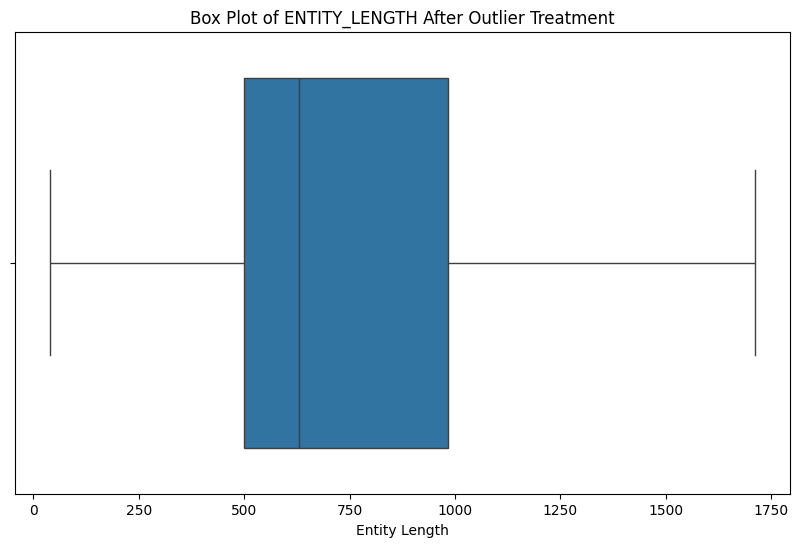

In [15]:
import numpy as np

def treat_outliers_iqr(df, column):
    """
    Function to treat outliers in a specific column using the IQR method.

    df : pandas.DataFrame
        The DataFrame containing the column to treat.

    column : str
        The name of the column in which to treat outliers.

    Returns:
    df : pandas.DataFrame
        The DataFrame with outliers treated.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier treatment for 'ENTITY_LENGTH' column in your training dataset
train = treat_outliers_iqr(data, 'ENTITY_LENGTH')

# Check if the outliers have been treated
plt.figure(figsize=(10, 6))
sns.boxplot(x='ENTITY_LENGTH', data=train)
plt.title('Box Plot of ENTITY_LENGTH After Outlier Treatment')
plt.xlabel('Entity Length')
plt.show()

In [16]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')


data['ENTITY_DESCRIPTION'] = data['ENTITY_DESCRIPTION'].str.lower()

data['ENTITY_DESCRIPTION'] = data['ENTITY_DESCRIPTION'].str.replace('[^\w\s]', '', regex=True)

from nltk.tokenize import word_tokenize
data['tokens'] = data['ENTITY_DESCRIPTION'].apply(word_tokenize)


In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(data['ENTITY_DESCRIPTION'])




In [ ]:
tfidf_train_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_train_df.head())